## Quick Start Examples


### Knapsack Instance

In the following examples, we will use the item list, weights, values, and weight limits given as follows. These values are taken from the problem statement in [RossettaCode Knapsack: 0-1](https://rosettacode.org/wiki/Knapsack_problem/0-1)

In [1]:
# defining instance
import numpy as np
# from KP_old import KnapsackProblem
from KP import KnapsackProblem, find_root

In [2]:
items = (
    ("map", 9, 150), ("compass", 13, 35), ("water", 153, 200), ("sandwich", 50, 160),
    ("glucose", 15, 60), ("tin", 68, 45), ("banana", 27, 60), ("apple", 39, 40),
    ("cheese", 23, 30), ("beer", 52, 10), ("suntan cream", 11, 70), ("camera", 32, 30),
    ("t-shirt", 24, 15), ("trousers", 48, 10), ("umbrella", 73, 40),
    ("waterproof trousers", 42, 70), ("waterproof overclothes", 43, 75),
    ("note-case", 22, 80), ("sunglasses", 7, 20), ("towel", 18, 12),
    ("socks", 4, 50), ("book", 30, 10),
    )

# defining weight and value vectors and weight limit
weight_vec = np.array([item[1] for item in items])
value_vec = np.array([item[2] for item in items])
Wlimit = 400

# defining instance of problem
KP_camping = KnapsackProblem(weights = weight_vec, values = value_vec, limit = Wlimit)

In [3]:
# computing minimum ratio
KP_camping.gamma_calc()

1.3068538226802475

### Running Large N Algorithm

In [4]:
soln = KP_camping.largeN_algorithm(T=1.0)
for k in range(len(soln)):
    if soln[k] == 1:
        print(items[k][0])

[ 0.25        0.24999999  0.18526639  0.25        0.25       -0.75
  0.25       -0.74996636 -0.16675815 -0.75        0.25       -0.74998727
 -0.74999988 -0.75       -0.75        0.24999987  0.25        0.25
  0.24998282 -0.74998653  0.25       -0.75      ]
[ True  True  True  True  True False  True False False False  True False
 False False False  True  True  True  True False  True False]
[-0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.18526639  0.24998282
  0.24999987  0.24999999  0.25        0.25        0.25        0.25
  0.25        0.25        0.25        0.25      ]
map
compass
water
sandwich
glucose
banana
suntan cream
waterproof trousers
waterproof overclothes
note-case
sunglasses
socks


### Plotting Potential Function

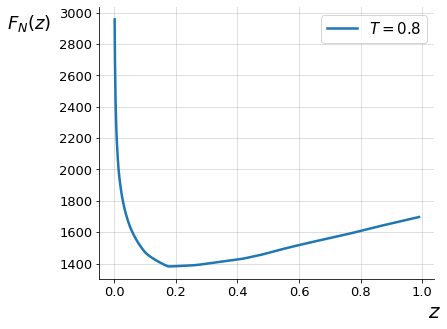

In [5]:
KP_camping.plot_potential(T = .75)

### Plotting Temperature Dependence of Value

/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/ipython_personal/2020_11_largeN_knapsack/largeNKP/KP.py:290: RuntimeWarning: invalid value encountered in log
  return - self.limit*np.log(z)-np.log(1-z) + np.sum(np.log(1+z**(self.weights)*np.exp(self.values/T)))


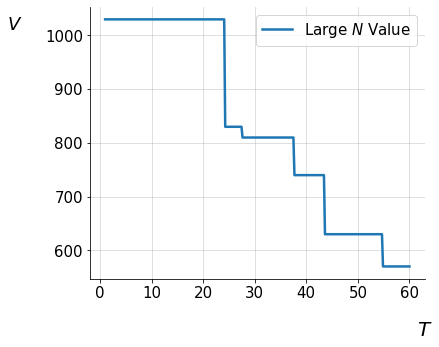

In [6]:
KP_camping.plot_value_vs_temp(temp_low=1.0, temp_high = 60.0)

### Algorithm Comparison

In [7]:
from tabulate import tabulate
from collections import defaultdict

import time

In [10]:
# dictionary of algorithm names and functions
algo_name_dict = {'Brute': KP_camping.brute_force,
                  'DP': KP_camping.knapsack01_dpV,
                  'FPTAS': KP_camping.fptas,
                  'Greedy': KP_camping.greedy,
                  'Annealing': KP_camping.simann_knapsack,
                  'Large N': KP_camping.largeN_algorithm}

# dictionary of algorithm names and results
results_name_dict = defaultdict(lambda: list())

for name, func in algo_name_dict.items():
    start_clock = time.time()
    soln  = func()
    
    # calculating values
    tot_value = str(round(np.dot(value_vec, soln), 0))
    tot_weight = str(round(np.dot(weight_vec, soln), 0))
    time_calc = str(round(time.time()-start_clock, 5)) 
    
    # assembling results
    results_name_dict[name] = [name, tot_value, tot_weight, time_calc]
    
# creating table of results
tabular_results = []
for k, v in results_name_dict.items():
    tabular_results.append(v) 

print(tabulate(tabular_results, ["Algorithm", "Value", "Weight ", "Time (sec)"], tablefmt="grid"))

Stopping annealing because error tolerance was reached
+-------------+---------+-----------+--------------+
| Algorithm   |   Value |   Weight  |   Time (sec) |
+=============+=========+===========+==============+
| Brute       |    1030 |       396 |     17.5572  |
+-------------+---------+-----------+--------------+
| DP          |    1030 |       396 |      0.00294 |
+-------------+---------+-----------+--------------+
| FPTAS       |    1030 |       396 |      0.00204 |
+-------------+---------+-----------+--------------+
| Greedy      |    1030 |       396 |      6e-05   |
+-------------+---------+-----------+--------------+
| Annealing   |     915 |       393 |      0.06022 |
+-------------+---------+-----------+--------------+
| Large N     |    1030 |       396 |      0.05974 |
+-------------+---------+-----------+--------------+


In [7]:
# dictionary of algorithm names and functions
algo_name_dict = {'Brute': KP_camping.brute_force,
                  'DP': KP_camping.knapsack01_dpV,
                  'FPTAS': KP_camping.fptas,
                  'Greedy': KP_camping.greedy,
                  'Annealing': KP_camping.simann_knapsack,
                  'Large N': KP_camping.largeN_algorithm}

# dictionary of algorithm names and results
results_name_dict = defaultdict(lambda: list())

for name, func in algo_name_dict.items():
    start_clock = time.time()
    soln  = func()
    
    # calculating values
    tot_value = str(round(np.dot(value_vec, soln), 0))
    tot_weight = str(round(np.dot(weight_vec, soln), 0))
    time_calc = str(round(time.time()-start_clock, 5)) 
    
    # assembling results
    results_name_dict[name] = [name, tot_value, tot_weight, time_calc]
    
# creating table of results
tabular_results = []
for k, v in results_name_dict.items():
    tabular_results.append(v) 

print(tabulate(tabular_results, ["Algorithm", "Value", "Weight ", "Time (sec)"], tablefmt="grid"))

Stopping annealing because error tolerance was reached
+-------------+---------+-----------+--------------+
| Algorithm   |   Value |   Weight  |   Time (sec) |
+=============+=========+===========+==============+
| Brute       |    1030 |       396 |     18.1333  |
+-------------+---------+-----------+--------------+
| DP          |    1030 |       396 |      0.00295 |
+-------------+---------+-----------+--------------+
| FPTAS       |    1030 |       396 |      0.00203 |
+-------------+---------+-----------+--------------+
| Greedy      |    1030 |       396 |      5e-05   |
+-------------+---------+-----------+--------------+
| Annealing   |     905 |       397 |      0.0646  |
+-------------+---------+-----------+--------------+
| Large N     |    1030 |       396 |      0.00075 |
+-------------+---------+-----------+--------------+


### Knapsack Variations: Bounded Version

In [2]:
items = (("map", 9, 150, 1),("compass", 13, 35, 1), ("water", 153, 200, 3),("sandwich", 50, 60, 2),
         ("glucose", 15, 60, 2),("tin", 68, 45, 3), ("banana", 27, 60, 3),("apple", 39, 40, 3),
            ("cheese", 23, 30, 1),("beer", 52, 10, 3),("suntan cream", 11, 70, 1),("camera", 32, 30, 1),
            ("t-shirt", 24, 15, 2),("trousers", 48, 10, 2),("umbrella", 73, 40, 1),("waterproof trousers", 42, 70, 1),
            ("waterproof overclothes", 43, 75, 1),("note-case", 22, 80, 1),("sunglasses", 7, 20, 1),("towel", 18, 12, 2),
            ("socks", 4, 50, 1),("book", 30, 10, 2),
           )

# defining weight and value vectors and weight limit
weight_vec = np.array([item[1] for item in items])
value_vec = np.array([item[2] for item in items])
bound_vec = np.array([item[3] for item in items])
Wlimit = 400

# defining instance of problem
KP_bounded = KnapsackProblem(weights = weight_vec, values = value_vec, limit = Wlimit, bounds = bound_vec)

In [3]:
soln = KP_bounded.largeN_algorithm(T = 4.10, threshold = 0.50)
print('Item: Item #')
print('-----------')
for k in range(len(soln)):
    if soln[k] == 1:
        print('%s : %i ' % (items[k][0], items[k][3]))
print()        
print('Total Value: %i' % (np.dot(soln, value_vec)))
print('Total Weight: %i' % (np.dot(soln, weight_vec)))

Item: Item #
-----------
map : 1 
compass : 1 
water : 3 
suntan cream : 1 
waterproof trousers : 1 
waterproof overclothes : 1 
note-case : 1 
sunglasses : 1 
socks : 1 

Total Value: 1050
Total Weight: 415


/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/ipython_personal/2020_11_largeN_knapsack/largeNKP/KP.py:218: RuntimeWarning: overflow encountered in power
  return -self.limit+ z/(1-z) + np.sum(self.weights/(z**(-self.weights)*np.exp(-self.values/T) -1 )) - np.sum((self.bounds+1)*self.weights/(z**(-(self.bounds+1)*self.weights)*np.exp(-(self.bounds+1)*self.values/T) - 1))
